<a href="https://colab.research.google.com/github/farshid101/Thesis-2024/blob/main/Multiclass_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import librares**

In [1]:
!pip install Keras-Preprocessing
!pip install keras==2.11.0
!pip install tensorflow==2.11.0
#!pip install --upgrade ktrain


In [2]:
#!pip install Keras-Preprocessing
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib
from collections import Counter
from textblob import Word
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
#from keras.preprocessing.text import Tokenizer
#from keras.models import Sequential, load_model
#from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
#from keras_preprocessing.sequence import pad_sequences
#from keras.utils.np_utils import to_categorical
#from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional

from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import re
!pip install ktrain
import ktrain
from ktrain import text
sns.set()
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

### **Load Dataset**

In [4]:
df=pd.read_csv("/content/Final_clean pro 2.csv")
#df['category'].value_counts()
df.head()

,Comments,Targets
0,তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো দে...,positive
1,🎯 ব্রহ্মপুত্র নদের ওপর নির্মিত ৯.১৫ কিলোমিটারে...,positive
2,😊 ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা,positive
3,2022 এর 25 এ জুন 🥰🥰,neutral
4,অনুভূতিটা এত সুন্দর ভাষায় প্রকাশ করতে পারতেছি...,positive


In [5]:
import pandas as pd

# Function to rename a single column
def change_column_name(df, old_name, new_name):
    df = df.rename(columns={old_name: new_name})
    return df

# Assuming df is your DataFrame
df = change_column_name(df, old_name="Comments", new_name="text")
df = change_column_name(df, old_name="Targets", new_name="category")
print(df.head())  # Display the first few rows of the DataFrame
#text

                                                text  category
0  তোমরা সবাই এই ভাই তাকে একটু  কোরোভিডিও গুলো দে...  positive
1  🎯 ব্রহ্মপুত্র নদের ওপর নির্মিত ৯.১৫ কিলোমিটারে...  positive
2         😊 ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা  positive
3                                2022 এর 25 এ জুন 🥰🥰   neutral
4  অনুভূতিটা এত সুন্দর ভাষায় প্রকাশ করতে পারতেছি...  positive


In [6]:
df.to_csv("bbc-text.csv", index=False)

In [7]:
df['category'].value_counts()

,count
category,
positive,2713
negative,1895
neutral,1767


# **Data Cleaning**

In [8]:
df['text']=df['text'].fillna("")
df.isna().sum()

,0
text,0
category,0


# **Preprocessing**

In [ ]:
# df['lower_case'] = df['text'].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' '))

# df['alphabatic'] = df['lower_case'].apply(lambda x: re.sub(r'[^a-zA-Z\']', ' ', x)).apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
# df['without-link'] = df['alphabatic'].apply(lambda x: re.sub(r'http\S+', '', x))

# tokenizer = RegexpTokenizer(r'\w+')
# df['Special_word'] = df.apply(lambda row: tokenizer.tokenize(row['lower_case']), axis=1)

# stop = [word for word in stopwords.words('english') if word not in ["my","haven't","aren't","can","no", "why", "through", "herself", "she", "he", "himself", "you", "you're", "myself", "not", "here", "some", "do", "does", "did", "will", "don't", "doesn't", "didn't", "won't", "should", "should've", "couldn't", "mightn't", "mustn't", "shouldn't", "hadn't", "wasn't", "wouldn't"]]

# df['stop_words'] = df['Special_word'].apply(lambda x: [item for item in x if item not in stop])
# df['stop_words'] = df['stop_words'].astype('str')

# df['short_word'] = df['stop_words'].str.findall('\w{2,}')
# df['string']=df['short_word'].str.join(' ')

# df['Text'] = df['string'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [12]:
!pip install bangla
!pip install bangla-stemmer
!pip install nltk


In [15]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from bangla_stemmer.stemmer import stemmer
nltk.download('stopwords')

# Assuming 'df' is your DataFrame and 'text' is the column with Bangla text data
# df = pd.DataFrame({
#     'text': [
#         'আমি বাংলায় গান গাই।',
#         'বাংলা ভাষা মিষ্টি।',
#         'বাংলাদেশ আমার দেশ।'
#     ]
# })

# Step 1: Lowercase and remove unwanted characters (if Bangla text has mixed case Latin)
df['lower_case'] = df['text'].apply(lambda x: x.strip().replace('\n', ' ').replace('\r', ' '))

# Step 2: Removing non-Bangla characters, keeping only Bangla script
df['alphabatic'] = df['lower_case'].apply(lambda x: re.sub(r'[^\u0980-\u09FF\s]', ' ', x))

# Step 3: Removing URLs if present
df['without-link'] = df['alphabatic'].apply(lambda x: re.sub(r'http\S+', '', x))

# Step 4: Tokenizing using regular expressions to split by whitespace
df['Special_word'] = df['without-link'].apply(lambda x: x.split())

# Step 5: Removing Bangla stop words
bangla_stopwords = set(stopwords.words('bengali'))
df['stop_words'] = df['Special_word'].apply(lambda x: [item for item in x if item not in bangla_stopwords])

# Step 6: Keeping words with 2 or more characters
df['short_word'] = df['stop_words'].apply(lambda x: [word for word in x if len(word) > 1])

# Step 7: Join words back to a sentence
df['string'] = df['short_word'].apply(lambda x: ' '.join(x))

# Step 8: Stemming using Bangla stemmer
bangla_stemmer = stemmer.BanglaStemmer()
df['Text'] = df['string'].apply(lambda x: " ".join([bangla_stemmer.stem(word) for word in x.split()]))

# Display the resulting DataFrame
print(df[['text', 'Text']])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Streaming output truncated to the last 5000 lines.
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..

In [16]:
df

,text,category,lower_case,alphabatic,without-link,Special_word,stop_words,short_word,string,Text
0,তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো দে...,positive,তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো দে...,তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো দে...,তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো দে...,"[তোমরা, সবাই, এই, ভাই, তাকে, একটু, কোরোভিডিও, ...","[তোমরা, সবাই, ভাই, একটু, কোরোভিডিও, গুলো, দেখো...","[তোমরা, সবাই, ভাই, একটু, কোরোভিডিও, গুলো, দেখো...",তোমরা সবাই ভাই একটু কোরোভিডিও গুলো দেখো ভাল লা...,তোমরা সবা ভাই একটু কোরোভিডি গুলো দেখো ভাল লাগল...
1,🎯 ব্রহ্মপুত্র নদের ওপর নির্মিত ৯.১৫ কিলোমিটারে...,positive,🎯 ব্রহ্মপুত্র নদের ওপর নির্মিত ৯.১৫ কিলোমিটারে...,ব্রহ্মপুত্র নদের ওপর নির্মিত ৯ ১৫ কিলোমিটারে...,ব্রহ্মপুত্র নদের ওপর নির্মিত ৯ ১৫ কিলোমিটারে...,"[ব্রহ্মপুত্র, নদের, ওপর, নির্মিত, ৯, ১৫, কিলোম...","[ব্রহ্মপুত্র, নদের, ওপর, নির্মিত, ৯, ১৫, কিলোম...","[ব্রহ্মপুত্র, নদের, ওপর, নির্মিত, ১৫, কিলোমিটা...",ব্রহ্মপুত্র নদের ওপর নির্মিত ১৫ কিলোমিটারের ভূ...,ব্রহ্মপুত্র নদের ওপর নির্মিত ১৫ কিলোমিটারের ভূ...
2,😊 ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা,positive,😊 ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা,ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা,ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা,"[ধন্যবাদ, মাননীয়, প্রধানমন্ত্রী, শেখ, হাসিনা]","[ধন্যবাদ, মাননীয়, প্রধানমন্ত্রী, শেখ, হাসিনা]","[ধন্যবাদ, মাননীয়, প্রধানমন্ত্রী, শেখ, হাসিনা]",ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা,ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা
3,2022 এর 25 এ জুন 🥰🥰,neutral,2022 এর 25 এ জুন 🥰🥰,এর এ জুন,এর এ জুন,"[এর, এ, জুন]",[জুন],[জুন],জুন,জুন
4,অনুভূতিটা এত সুন্দর ভাষায় প্রকাশ করতে পারতেছি...,positive,অনুভূতিটা এত সুন্দর ভাষায় প্রকাশ করতে পারতেছি...,অনুভূতিটা এত সুন্দর ভাষায় প্রকাশ করতে পারতেছি...,অনুভূতিটা এত সুন্দর ভাষায় প্রকাশ করতে পারতেছি...,"[অনুভূতিটা, এত, সুন্দর, ভাষায়, প্রকাশ, করতে, ...","[অনুভূতিটা, সুন্দর, ভাষায়, প্রকাশ, পারতেছি, চ...","[অনুভূতিটা, সুন্দর, ভাষায়, প্রকাশ, পারতেছি, চ...",অনুভূতিটা সুন্দর ভাষায় প্রকাশ পারতেছি চোখের প...,অনুভূতি সুন্দর ভাষায় প্রকাশ পারতেছি চোখ পানি ...
...,...,...,...,...,...,...,...,...,...,...
6370,সব পিকাব বন্দ করে দেয়া হোক,negative,সব পিকাব বন্দ করে দেয়া হোক,সব পিকাব বন্দ করে দেয়া হোক,সব পিকাব বন্দ করে দেয়া হোক,"[সব, পিকাব, বন্দ, করে, দেয়া, হোক]","[পিকাব, বন্দ, দেয়া]","[পিকাব, বন্দ, দেয়া]",পিকাব বন্দ দেয়া,পিকাব বন্দ দেয়া
6371,এটাতো গোটারি কথা কারণ কোরআনের বদলে গান বলে উদ্...,neutral,এটাতো গোটারি কথা কারণ কোরআনের বদলে গান বলে উদ্...,এটাতো গোটারি কথা কারণ কোরআনের বদলে গান বলে উদ্...,এটাতো গোটারি কথা কারণ কোরআনের বদলে গান বলে উদ্...,"[এটাতো, গোটারি, কথা, কারণ, কোরআনের, বদলে, গান,...","[এটাতো, গোটারি, কথা, কোরআনের, গান, উদ্বোধন]","[এটাতো, গোটারি, কথা, কোরআনের, গান, উদ্বোধন]",এটাতো গোটারি কথা কোরআনের গান উদ্বোধন,এটা গোটারি কথা কোরআন গান উদ্বোধন
6372,এগুলা সব বিনপির এর কাজ,neutral,এগুলা সব বিনপির এর কাজ,এগুলা সব বিনপির এর কাজ,এগুলা সব বিনপির এর কাজ,"[এগুলা, সব, বিনপির, এর, কাজ]","[এগুলা, বিনপির]","[এগুলা, বিনপির]",এগুলা বিনপির,এগুলা বিনপির
6373,এইবার ট্রাক বন্ধ করে দেয়া হোক,negative,এইবার ট্রাক বন্ধ করে দেয়া হোক,এইবার ট্রাক বন্ধ করে দেয়া হোক,এইবার ট্রাক বন্ধ করে দেয়া হোক,"[এইবার, ট্রাক, বন্ধ, করে, দেয়া, হোক]","[এইবার, ট্রাক, বন্ধ, দেয়া]","[এইবার, ট্রাক, বন্ধ, দেয়া]",এইবার ট্রাক বন্ধ দেয়া,এইব ট্রাক বন্ধ দেয়া


## Visualization

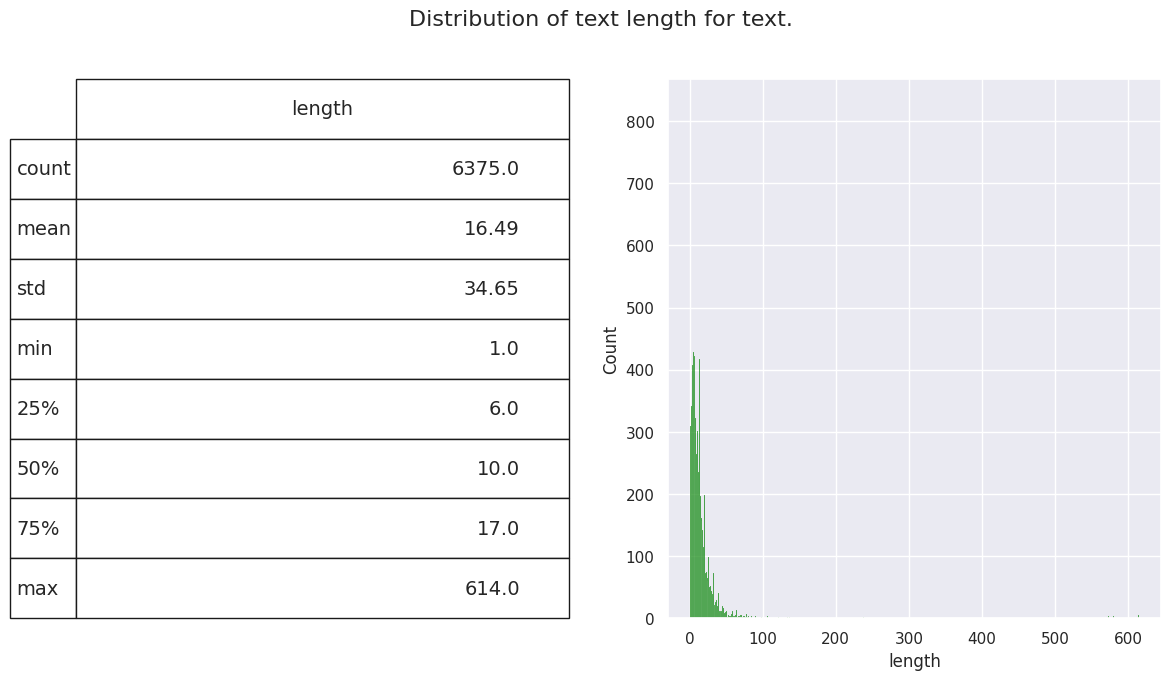

In [17]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for text.', fontsize=16)

plt.show()

<Axes: xlabel='category', ylabel='count'>

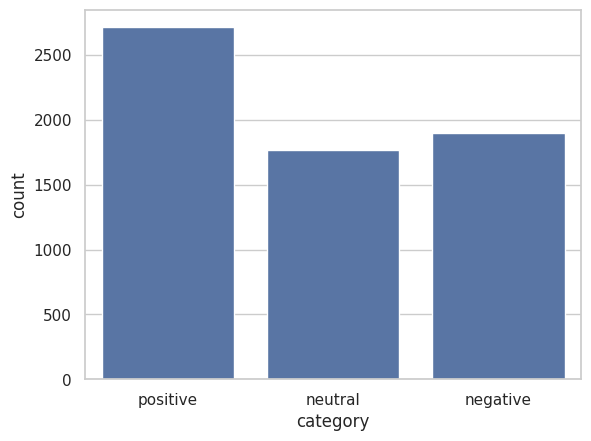

In [18]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["category"])

In [19]:
top = Counter([item for sublist in df['short_word'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [22]:
df.category.value_counts()

,count
category,
positive,2713
negative,1895
neutral,1767


In [23]:
sport_text = df[df['category']=='positive']
business_text = df[df['category']=='negative']
politics_text = df[df['category']=='neutral']
#tech_text = df[df['category']=='tech']
#entertainment_text = df[df['category']=='entertainment']

In [24]:
top = Counter([item for sublist in sport_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in sport_text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [25]:
top = Counter([item for sublist in business_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in business_text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [26]:
top = Counter([item for sublist in politics_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in politics_text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [28]:
# top = Counter([item for sublist in tech_text['short_word'] for item in sublist])
# temp_positive = pd.DataFrame(top.most_common(20))
# temp_positive.columns = ['Common_words','count']
# fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in tech_text', orientation='h',
#              width=700, height=700,color='Common_words')
# fig.show()

In [31]:
bangla_words = [
    'প্রতি', 'দেখা', 'ভালো', 'খেলা', 'সময়', 'পরে', 'আগে', 'হতে', 'যখন', 'কখন', 'জানতে', 'কথা',
    'নিয়ে', 'তখন', 'আমরা', 'নিজে', 'তুমি', 'আপনি', 'কাজ', 'চেষ্টা', 'কোন', 'যদি', 'হয়েছে', 'হচ্ছে',
    'এবং', 'কাছে', 'খুব', 'ভাবি', 'যায়', 'দিয়ে', 'মনে', 'আছে', 'করতে', 'এখানে', 'ওখানে', 'কথায়',
    'বলে', 'অনেক', 'নতুন', 'বেশি', 'আগে', 'শেষ', 'কেন', 'ছাড়া', 'ছোট', 'বড়', 'দুর্ঘটনা', 'দেখিয়ে',
    'যত', 'তত', 'যাও', 'কর', 'আসা', 'যাবে', 'আসবে', 'থাকে', 'নাম', 'বড়', 'মাঝে', 'অল্প', 'দিন',
    'রাত', 'বছর', 'মাস', 'সময়', 'মাঝে', 'দিন', 'এত', 'কম', 'ঠিক', 'অন্য', 'সত্য', 'খবর', 'কারণ',
    'কার', 'কখনো', 'সব', 'যা', 'বেশ', 'জানি', 'কিছু', 'চলে', 'আবার', 'নয়', 'পার', 'মাঝখানে',
    'ধন্যবাদ', 'আমার', 'তোমার', 'উপর', 'নিচে', 'দিক', 'এত', 'তাড়াতাড়ি', 'ধীরে', 'দেখে', 'শুনে',
    'কখনও', 'কখনো', 'যতই'
]


In [32]:
from collections import Counter
import pandas as pd
import plotly.express as px

# Example data
from collections import Counter
import pandas as pd
import plotly.express as px

# Example data
tech_text = pd.DataFrame({
    'short_word': [bangla_words]  # Add the list of Bangla words as a single entry
})



# Step 1: Count the most common words
top = Counter([item for sublist in tech_text['short_word'] for item in sublist])

# Step 2: Create a DataFrame from the most common words
temp_positive = pd.DataFrame(top.most_common(20), columns=['Common_words', 'count'])

# Step 3: Check if temp_positive is not empty before plotting
if not temp_positive.empty:
    fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Common Words in tech_text', orientation='h',
                 width=700, height=700, color='Common_words')
    fig.show()
else:
    print("No common words found in the provided data.")


# Step 1: Count the most common words
top = Counter([item for sublist in tech_text['short_word'] for item in sublist])

# Step 2: Create a DataFrame from the most common words
temp_positive = pd.DataFrame(top.most_common(20), columns=['Common_words', 'count'])

# Step 3: Check if temp_positive is not empty before plotting
if not temp_positive.empty:
    fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Common Words in tech_text', orientation='h',
                 width=700, height=700, color='Common_words')
    fig.show()
else:
    print("No common words found in the provided data.")


In [34]:
from collections import Counter
import pandas as pd
import plotly.express as px

# Example DataFrame (make sure to replace this with your actual data)
entertainment_text = pd.DataFrame({
     'short_word': [bangla_words]
})

# Step 1: Count the most common words
top = Counter([item for sublist in entertainment_text['short_word'] for item in sublist])

# Step 2: Create a DataFrame from the most common words
if top:  # Check if Counter is not empty
    temp_positive = pd.DataFrame(top.most_common(20), columns=['Common_words', 'count'])

    # Step 3: Check if temp_positive is not empty before plotting
    if not temp_positive.empty:
        fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Common Words in entertainment_text',
                     orientation='h', width=700, height=700, color='Common_words')
        fig.show()
    else:
        print("No common words found in the provided data.")
else:
    print("No words found in the entertainment_text['short_word'] column.")


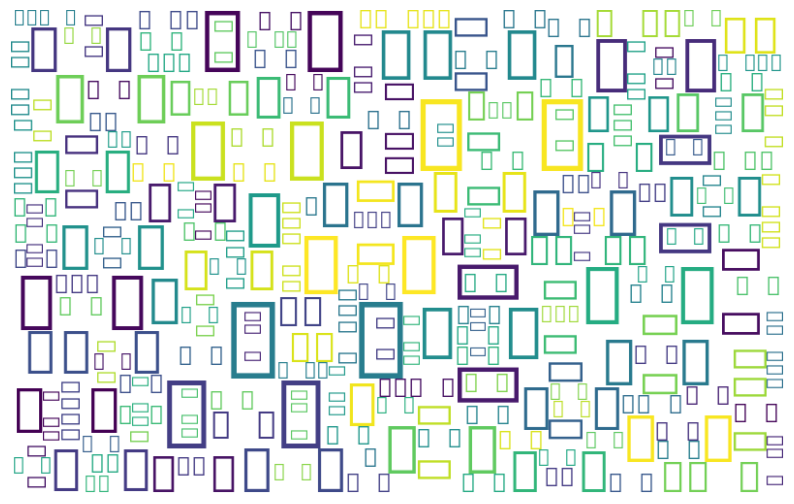

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all Bangla text into a single string
normal_words = ' '.join([text for text in df['Text'] if isinstance(text, str)])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=500,
    random_state=21,
    max_font_size=110,
    background_color='white'  # Set background color to white for better visibility
).generate(normal_words)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Turn off the axis
plt.show()


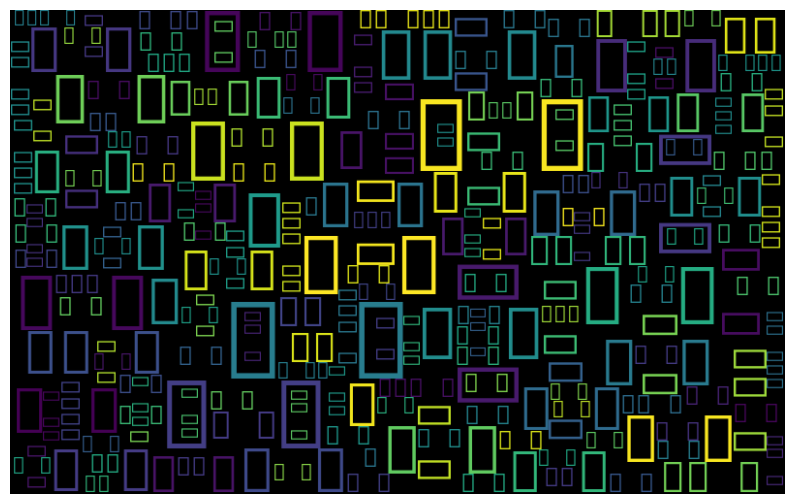

In [35]:
normal_words =' '.join([text for text in df['Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [40]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'sport']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [41]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'business']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

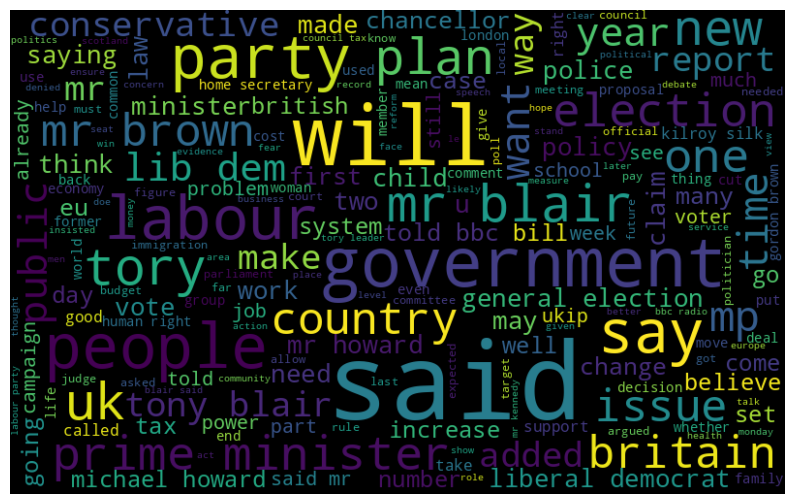

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'politics']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

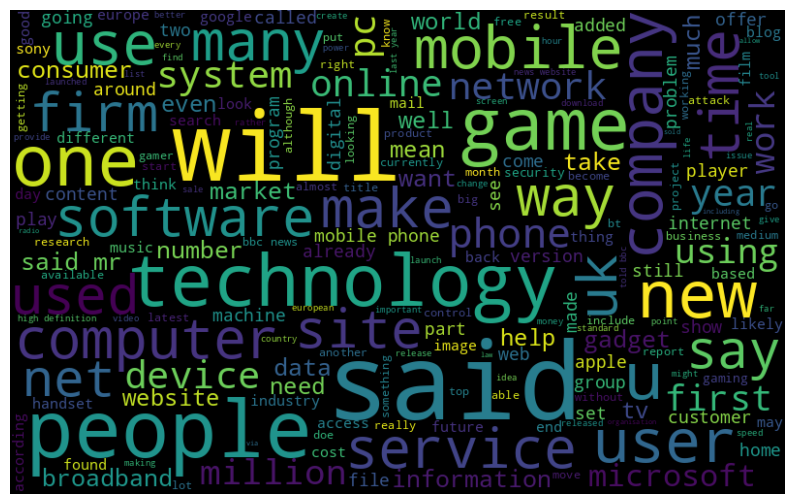

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'tech']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

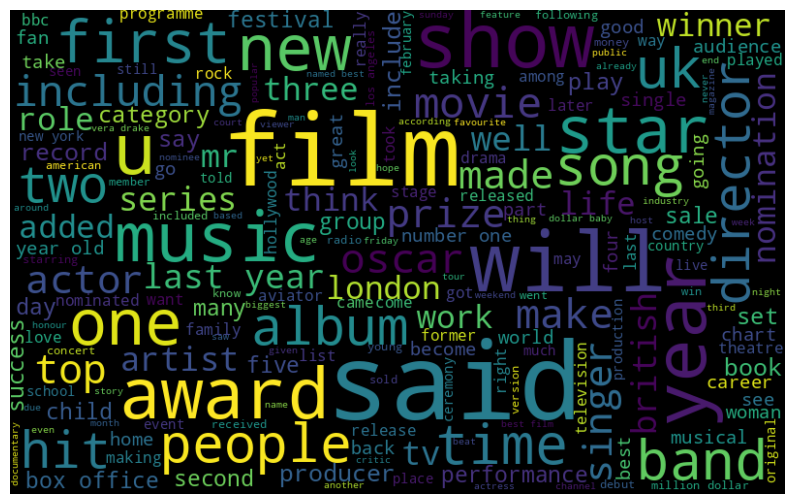

In [ ]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'entertainment']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## **Applying N-gram**

In [42]:
x_train, x_test, y_train, y_test = train_test_split(df["Text"],df["category"], test_size = 0.25, random_state = 42)
count_vect = CountVectorizer(ngram_range=(1, 2))
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(4781, 18821) (1594, 18821) (4781,) (1594,)


In [43]:
joblib.dump(count_vect, 'count_vect.pkl')
#model = joblib.load('count_vect.pkl')

['count_vect.pkl']

# **Machine Learning Models**

# **Logistic Regression**

In [44]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

Accuracy: 0.5376411543287327
              precision    recall  f1-score   support

    negative       0.49      0.43      0.46       456
     neutral       0.49      0.45      0.47       461
    positive       0.59      0.67      0.63       677

    accuracy                           0.54      1594
   macro avg       0.52      0.52      0.52      1594
weighted avg       0.53      0.54      0.53      1594



In [47]:
df.head()

,text,category,lower_case,alphabatic,without-link,Special_word,stop_words,short_word,string,Text,length
0,তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো দে...,positive,তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো দে...,তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো দে...,তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো দে...,"[তোমরা, সবাই, এই, ভাই, তাকে, একটু, কোরোভিডিও, ...","[তোমরা, সবাই, ভাই, একটু, কোরোভিডিও, গুলো, দেখো...","[তোমরা, সবাই, ভাই, একটু, কোরোভিডিও, গুলো, দেখো...",তোমরা সবাই ভাই একটু কোরোভিডিও গুলো দেখো ভাল লা...,তোমরা সবা ভাই একটু কোরোভিডি গুলো দেখো ভাল লাগল...,14
1,🎯 ব্রহ্মপুত্র নদের ওপর নির্মিত ৯.১৫ কিলোমিটারে...,positive,🎯 ব্রহ্মপুত্র নদের ওপর নির্মিত ৯.১৫ কিলোমিটারে...,ব্রহ্মপুত্র নদের ওপর নির্মিত ৯ ১৫ কিলোমিটারে...,ব্রহ্মপুত্র নদের ওপর নির্মিত ৯ ১৫ কিলোমিটারে...,"[ব্রহ্মপুত্র, নদের, ওপর, নির্মিত, ৯, ১৫, কিলোম...","[ব্রহ্মপুত্র, নদের, ওপর, নির্মিত, ৯, ১৫, কিলোম...","[ব্রহ্মপুত্র, নদের, ওপর, নির্মিত, ১৫, কিলোমিটা...",ব্রহ্মপুত্র নদের ওপর নির্মিত ১৫ কিলোমিটারের ভূ...,ব্রহ্মপুত্র নদের ওপর নির্মিত ১৫ কিলোমিটারের ভূ...,79
2,😊 ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা,positive,😊 ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা,ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা,ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা,"[ধন্যবাদ, মাননীয়, প্রধানমন্ত্রী, শেখ, হাসিনা]","[ধন্যবাদ, মাননীয়, প্রধানমন্ত্রী, শেখ, হাসিনা]","[ধন্যবাদ, মাননীয়, প্রধানমন্ত্রী, শেখ, হাসিনা]",ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা,ধন্যবাদ মাননীয় প্রধানমন্ত্রী শেখ হাসিনা,6
3,2022 এর 25 এ জুন 🥰🥰,neutral,2022 এর 25 এ জুন 🥰🥰,এর এ জুন,এর এ জুন,"[এর, এ, জুন]",[জুন],[জুন],জুন,জুন,6
4,অনুভূতিটা এত সুন্দর ভাষায় প্রকাশ করতে পারতেছি...,positive,অনুভূতিটা এত সুন্দর ভাষায় প্রকাশ করতে পারতেছি...,অনুভূতিটা এত সুন্দর ভাষায় প্রকাশ করতে পারতেছি...,অনুভূতিটা এত সুন্দর ভাষায় প্রকাশ করতে পারতেছি...,"[অনুভূতিটা, এত, সুন্দর, ভাষায়, প্রকাশ, করতে, ...","[অনুভূতিটা, সুন্দর, ভাষায়, প্রকাশ, পারতেছি, চ...","[অনুভূতিটা, সুন্দর, ভাষায়, প্রকাশ, পারতেছি, চ...",অনুভূতিটা সুন্দর ভাষায় প্রকাশ পারতেছি চোখের প...,অনুভূতি সুন্দর ভাষায় প্রকাশ পারতেছি চোখ পানি ...,18


In [48]:
mc = count_vect.transform(["তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো"])
m = transformer.transform(mc)
y_pred = lr.predict(m)
print(y_pred)

['positive']


In [46]:
scores = cross_val_score(lr, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred1))
print ("Cross-validated scores:", scores)

0.5376411543287327
Cross-validated scores: [0.54697286 0.50627615 0.56485356 0.56276151 0.5460251  0.56485356
 0.56276151 0.57112971 0.55230126 0.56694561]


In [49]:
joblib.dump(lr, 'Text_LR.pkl')
#model = joblib.load('Text_LR.pkl')

['Text_LR.pkl']

# **Support Vector Machine**

In [50]:
svc = LinearSVC()
svc.fit(x_train_tfidf, y_train)
y_pred2 = svc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred2)))
print(classification_report(y_test, y_pred2))

Accuracy: 0.5319949811794228
              precision    recall  f1-score   support

    negative       0.49      0.44      0.46       456
     neutral       0.47      0.47      0.47       461
    positive       0.60      0.64      0.62       677

    accuracy                           0.53      1594
   macro avg       0.52      0.52      0.52      1594
weighted avg       0.53      0.53      0.53      1594



In [51]:
mc = count_vect.transform(["To combat this trend, we need politicians who are willing to stand up for the interests of the working class. We need leaders who are committed to creating a more just and equitable society, where everyone has a chance to succeed regardless of their background."])
m = transformer.transform(mc)
y_pred = svc.predict(m)
print(y_pred)

['neutral']


In [52]:
scores = cross_val_score(svc, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred2))
print ("Cross-validated scores:", scores)

0.5319949811794228
Cross-validated scores: [0.53235908 0.5041841  0.55230126 0.54393305 0.5251046  0.55439331
 0.55857741 0.56903766 0.5334728  0.54811715]


In [53]:
joblib.dump(svc, 'Text_SVM.pkl')
#model = joblib.load('Text_SVM.pkl')

['Text_SVM.pkl']



## **Naive Bayes(Multinomial)**

In [54]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred3 = mnb.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred3)))
print(classification_report(y_test, y_pred3))

Accuracy: 0.48117942283563364
              precision    recall  f1-score   support

    negative       0.55      0.25      0.35       456
     neutral       0.59      0.08      0.14       461
    positive       0.47      0.91      0.62       677

    accuracy                           0.48      1594
   macro avg       0.54      0.41      0.37      1594
weighted avg       0.53      0.48      0.40      1594



In [55]:
mc = count_vect.transform(["তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো"])
m = transformer.transform(mc)
y_pred = mnb.predict(m)
print(y_pred)

['positive']


In [56]:
scores = cross_val_score(mnb, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred3))
print ("Cross-validated scores:", scores)

0.48117942283563364
Cross-validated scores: [0.47181628 0.4623431  0.4916318  0.47698745 0.4874477  0.4958159
 0.48953975 0.5083682  0.4874477  0.49790795]


## **Randomforest**


In [57]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced')
rfc.fit(x_train_tfidf,y_train)
y_pred4 = rfc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred4)))
print(classification_report(y_test, y_pred4))

Accuracy: 0.5307402760351317
              precision    recall  f1-score   support

    negative       0.54      0.38      0.45       456
     neutral       0.43      0.80      0.56       461
    positive       0.74      0.44      0.55       677

    accuracy                           0.53      1594
   macro avg       0.57      0.54      0.52      1594
weighted avg       0.59      0.53      0.53      1594



In [58]:
mc = count_vect.transform(["তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো"])
m = transformer.transform(mc)
y_pred = rfc.predict(m)
print(y_pred)

['negative']


In [59]:
scores = cross_val_score(rfc, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred4))
print ("Cross-validated scores:", scores)

0.5307402760351317
Cross-validated scores: [0.54279749 0.51882845 0.55439331 0.5125523  0.53556485 0.57949791
 0.541841   0.56276151 0.52301255 0.58158996]


# **GradientBoostingClassifier**

In [63]:
# gbc = GradientBoostingClassifier(n_estimators=100, max_features='auto', max_depth=4, random_state=1, verbose=1)
# gbc.fit(x_train_tfidf, y_train)
# y_pred5 = gbc.predict(x_test_tfidf)
# print(accuracy_score(y_test, y_pred5))
# print(classification_report(y_test, y_pred5))

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the GradientBoostingClassifier with a valid max_features value
gbc = GradientBoostingClassifier(n_estimators=100, max_features=None, max_depth=4, random_state=1, verbose=1)

# Fit the model on the training data
gbc.fit(x_train_tfidf, y_train)

# Make predictions on the test data
y_pred5 = gbc.predict(x_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred5))
print(classification_report(y_test, y_pred5))


      Iter       Train Loss   Remaining Time 
         1           1.0592           20.68s
         2           1.0425           20.82s
         3           1.0283           21.42s
         4           1.0163           21.04s
         5           1.0056           20.89s
         6           0.9961           20.45s
         7           0.9874           20.14s
         8           0.9795           19.80s
         9           0.9723           19.68s
        10           0.9657           19.38s
        20           0.9166           17.01s
        30           0.8851           14.58s
        40           0.8613           12.32s
        50           0.8423           10.22s
        60           0.8262            7.77s
        70           0.8119            5.55s
        80           0.7987            3.57s
        90           0.7874            1.74s
       100           0.7759            0.00s
Accuracy: 0.5388958594730239
              precision    recall  f1-score   support

    negative   

In [65]:
scores = cross_val_score(gbc, x_train_tfidf,y_train, cv=5)
print(accuracy_score(y_test,y_pred5))
print ("Cross-validated scores:", scores)

      Iter       Train Loss   Remaining Time 
         1           1.0581           29.89s
         2           1.0405           29.51s
         3           1.0254           29.15s
         4           1.0125           29.29s
         5           1.0009           28.74s
         6           0.9905           28.52s
         7           0.9809           28.25s
         8           0.9725           28.02s
         9           0.9649           27.69s
        10           0.9574           27.42s
        20           0.9056           24.18s
        30           0.8738           21.24s
        40           0.8495           20.39s
        50           0.8290           19.89s
        60           0.8107           16.89s
        70           0.7944           12.20s
        80           0.7791            7.90s
        90           0.7666            3.84s
       100           0.7543            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.0595           41.05s
        

## **Ensemble Classifier**

In [66]:
mnb = MultinomialNB()
rfc= RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=42)
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
svc = SVC(probability=True)
ec=VotingClassifier(estimators=[('Multinominal NB', mnb), ('Random Forest', rfc),('Logistic Regression',lr),('Support Vector Machine',svc)], voting='soft', weights=[1,2,3,4])
ec.fit(x_train_tfidf,y_train)
y_pred6 = ec.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

0.5269761606022585
              precision    recall  f1-score   support

    negative       0.49      0.40      0.44       456
     neutral       0.49      0.36      0.42       461
    positive       0.55      0.72      0.63       677

    accuracy                           0.53      1594
   macro avg       0.51      0.50      0.50      1594
weighted avg       0.52      0.53      0.51      1594



In [67]:
mc = count_vect.transform(["But what really set this movie apart for me was the way it integrated Chinese culture and mythology into the story. As a Chinese-American myself, it was incredibly meaningful to see my culture and heritage represented on the big screen in such a beautiful and authentic way. From the stunning visuals to the traditional music and dance, everything felt like it was done with care and respect."])
m = transformer.transform(mc)
y_pred = ec.predict(m)
print(y_pred)

['neutral']


In [68]:
scores = cross_val_score(ec, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred6))
print ("Cross-validated scores:", scores)

0.5269761606022585
Cross-validated scores: [0.52818372 0.51046025 0.54393305 0.5376569  0.5460251  0.55230126
 0.57322176 0.53974895 0.53556485 0.54811715]


In [69]:
joblib.dump(ec, 'Text_Ensemble.pkl')
#model = joblib.load('Text_Ensemble.pkl')

['Text_Ensemble.pkl']

## **AdaBoost with Random Forest Classifier**

In [71]:
# rfc = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=0)
# abc= AdaBoostClassifier(base_estimator=rfc, learning_rate=0.2, n_estimators=100)
# abc.fit(x_train_tfidf, y_train)
# y_pred7= abc.predict(x_test_tfidf)
# print("Accuracy: "+str(accuracy_score(y_test, y_pred7)))
# print(classification_report(y_test, y_pred7))

In [75]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# Initialize the AdaBoostClassifier with default base estimator (DecisionTreeClassifier)
abc = AdaBoostClassifier(learning_rate=0.2, n_estimators=100)

# Fit the AdaBoost model on the training data
abc.fit(x_train_tfidf, y_train)

# Make predictions on the test data
y_pred7 = abc.predict(x_test_tfidf)

# Evaluate the model's accuracy and print the classification report
print("Accuracy: " + str(accuracy_score(y_test, y_pred7)))
print(classification_report(y_test, y_pred7))


Accuracy: 0.5420326223337516
              precision    recall  f1-score   support

    negative       0.60      0.27      0.38       456
     neutral       0.46      0.70      0.55       461
    positive       0.61      0.62      0.61       677

    accuracy                           0.54      1594
   macro avg       0.56      0.53      0.51      1594
weighted avg       0.56      0.54      0.53      1594



In [76]:
scores = cross_val_score(abc, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred7))
print ("Cross-validated scores:", scores)

0.5420326223337516
Cross-validated scores: [0.54070981 0.5209205  0.57949791 0.5292887  0.5251046  0.541841
 0.56903766 0.55020921 0.5292887  0.55857741]


# **Comparison Between ML Models**

In [77]:
Comparison_unibi = pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,y_pred1)*100,f1_score(y_test,y_pred1,average='macro')*100,recall_score(y_test, y_pred1,average='micro')*100,precision_score(y_test, y_pred1,average='micro')*100],
                            'SVM':[accuracy_score(y_test,y_pred2)*100,f1_score(y_test,y_pred2,average='macro')*100,recall_score(y_test, y_pred2,average='micro')*100,precision_score(y_test, y_pred2,average='micro')*100],
                           'Naive Bayes':[accuracy_score(y_test,y_pred3)*100,f1_score(y_test,y_pred3,average='macro')*100,recall_score(y_test, y_pred3,average='micro')*100,precision_score(y_test, y_pred3,average='micro')*100],
                           'Random Forest':[accuracy_score(y_test,y_pred4)*100,f1_score(y_test,y_pred4,average='macro')*100,recall_score(y_test, y_pred4,average='micro')*100,precision_score(y_test, y_pred4,average='micro')*100],
                           'GradientBoosting':[accuracy_score(y_test,y_pred5)*100,f1_score(y_test,y_pred5,average='macro')*100,recall_score(y_test, y_pred5,average='micro')*100,precision_score(y_test, y_pred5,average='micro')*100],
                           'Ensembled':[accuracy_score(y_test,y_pred6)*100,f1_score(y_test,y_pred6,average='macro')*100,recall_score(y_test, y_pred6,average='micro')*100,precision_score(y_test, y_pred6,average='micro')*100],
                           'Adaboost':[accuracy_score(y_test,y_pred7)*100,f1_score(y_test,y_pred7,average='macro')*100,recall_score(y_test, y_pred7,average='micro')*100,precision_score(y_test, y_pred7,average='micro')*100],

})

In [78]:
print ('Comparison using uni-bi-gram(1,2)')
Comparison_unibi.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison_unibi.head()

Comparison using uni-bi-gram(1,2)


,Logistic Regression,SVM,Naive Bayes,Random Forest,GradientBoosting,Ensembled,Adaboost
Accuracy,53.764115,53.199498,48.117942,53.074028,53.889586,52.697616,54.203262
F1_score,51.811642,51.587620,36.702159,52.083183,52.349439,49.596025,51.422212
Recall,53.764115,53.199498,48.117942,53.074028,53.889586,52.697616,54.203262
Precision,53.764115,53.199498,48.117942,53.074028,53.889586,52.697616,54.203262


# **Deep Learning Models**

In [ ]:
vocabulary_size = 15000
max_text_len = 768
stemmer = SnowballStemmer('english')
stop_words = [word for word in stopwords.words('english') if word not in ["my","haven't","aren't","can","no", "why", "through", "herself", "she", "he", "himself", "you", "you're", "myself", "not", "here", "some", "do", "does", "did", "will", "don't", "doesn't", "didn't", "won't", "should", "should've", "couldn't", "mightn't", "mustn't", "shouldn't", "hadn't", "wasn't", "wouldn't"]]

In [ ]:
def preprocess_text(text):

    text = re.sub('[^a-zA-Z]', ' ', text)

    words = text.lower().split()

    words = [stemmer.stem(word) for word in words if not word in stop_words]

    cleaned_text = ' '.join(words)
    return cleaned_text

df['cleaned_text'] = df['text'].apply(preprocess_text)

In [ ]:
tokenizer = Tokenizer(num_words=vocabulary_size)
tokenizer.fit_on_texts(df['cleaned_text'].values)
le = len(tokenizer.word_index) + 1
print(le)
sequences = tokenizer.texts_to_sequences(df['cleaned_text'].values)
X_DeepLearning = pad_sequences(sequences, maxlen=max_text_len)

18884


In [ ]:
df.loc[df['category'] == 'Sport' , 'LABEL'] = 0
df.loc[df['category'] == 'Business', 'LABEL'] = 1
df.loc[df['category'] == 'Politics' , 'LABEL'] = 2
df.loc[df['category'] == 'Tech', 'LABEL'] = 3
df.loc[df['category'] == 'Entertainment', 'LABEL'] = 4

labels = to_categorical(df['LABEL'], num_classes=5)
XX_train, XX_test, y_train, y_test = train_test_split(X_DeepLearning , labels, test_size=0.25, random_state=42)
print((XX_train.shape, y_train.shape, XX_test.shape, y_test.shape))

((1668, 768), (1668, 5), (557, 768), (557, 5))


# **LSTM 1-Layer**

In [ ]:
epochs = 25
emb_dim = 256
batch_size = 50
model_lstm1 = Sequential()
model_lstm1.add(Embedding(vocabulary_size,emb_dim, input_length=X_DeepLearning.shape[1]))
model_lstm1.add(SpatialDropout1D(0.8))
model_lstm1.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout=0.5)))
model_lstm1.add(Dropout(0.5))
model_lstm1.add(Flatten())
model_lstm1.add(Dense(64, activation='relu'))
model_lstm1.add(Dropout(0.5))
model_lstm1.add(Dense(5, activation='softmax'))
model_lstm1.compile(optimizer=tf.optimizers.Adam(),loss='categorical_crossentropy', metrics=['acc'])
print(model_lstm1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 768, 256)          3840000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 768, 256)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 600)              1336800   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 600)               0         
                                                                 
 flatten (Flatten)           (None, 600)               0         
                                                                 
 dense (Dense)               (None, 64)                3

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath="lastm-1-layer-best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_lstm1 = model_lstm1.fit(XX_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(XX_test,y_test), callbacks=callbacks)

Epoch 1/25
34/34 [==============================] - ETA: 0s - loss: 1.6074 - acc: 0.2194
Epoch 1: val_acc improved from -inf to 0.29084, saving model to lastm-1-layer-best_model.h5
34/34 [==============================] - 261s 7s/step - loss: 1.6074 - acc: 0.2194 - val_loss: 1.5983 - val_acc: 0.2908 - lr: 0.0010
Epoch 2/25
34/34 [==============================] - ETA: 0s - loss: 1.5809 - acc: 0.2752
Epoch 2: val_acc improved from 0.29084 to 0.42908, saving model to lastm-1-layer-best_model.h5
34/34 [==============================] - 246s 7s/step - loss: 1.5809 - acc: 0.2752 - val_loss: 1.5335 - val_acc: 0.4291 - lr: 0.0010
Epoch 3/25
34/34 [==============================] - ETA: 0s - loss: 1.3708 - acc: 0.4269
Epoch 3: val_acc did not improve from 0.42908
34/34 [==============================] - 248s 7s/step - loss: 1.3708 - acc: 0.4269 - val_loss: 1.2807 - val_acc: 0.3752 - lr: 0.0010
Epoch 4/25
34/34 [==============================] - ETA: 0s - loss: 1.0922 - acc: 0.5198
Epoch 4: val

In [ ]:
results_1 = model_lstm1.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_1[0]} - Accuracy: {100*results_1[1]}%')

Test results - Loss: 0.36485812067985535 - Accuracy: 92.81867146492004%


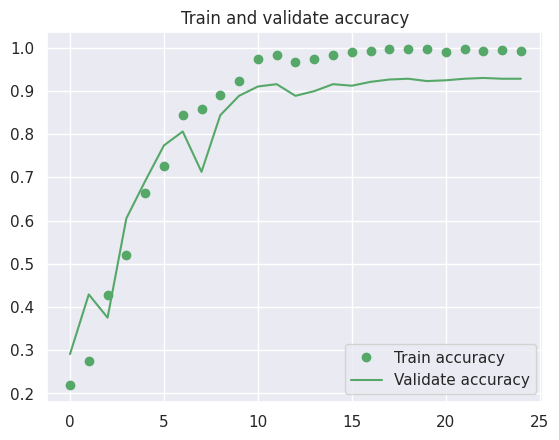

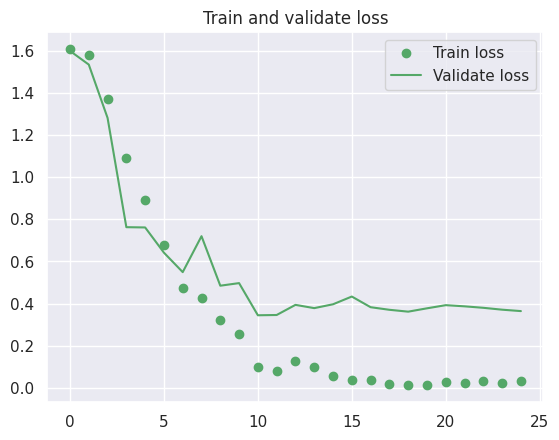

In [ ]:
acc = history_lstm1.history['acc']
val_acc = history_lstm1.history['val_acc']
loss = history_lstm1.history['loss']
val_loss = history_lstm1.history['val_loss']
plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()

plt.figure()
plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()
plt.show()

## **LSTM 2-Layers**

In [ ]:
epochs = 20
emb_dim = 120
batch_size = 50
model_lstm2 = Sequential()
model_lstm2.add(Embedding(vocabulary_size,emb_dim ,input_length=X_DeepLearning.shape[1]))
model_lstm2.add(SpatialDropout1D(0.8))
model_lstm2.add(Bidirectional(LSTM(200, dropout=0.5, recurrent_dropout=0.5, return_sequences= True)))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout =0.5)))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Flatten())
model_lstm2.add(Dense(64, activation='relu'))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Dense(5, activation='softmax'))
model_lstm2.compile(optimizer=tf.optimizers.Adam(),loss='categorical_crossentropy', metrics=['acc'])
print(model_lstm2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 768, 120)          1800000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 768, 120)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 768, 400)         513600    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 768, 400)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 600)              1682400   
 nal)                                                            
                                                        

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath="lastm-2-layer-best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks2=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_lstm2 = model_lstm2.fit(XX_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(XX_test,y_test), callbacks=callbacks2)

Epoch 1/20
34/34 [==============================] - ETA: 0s - loss: 1.6115 - acc: 0.2080 
Epoch 1: val_acc improved from -inf to 0.22262, saving model to lastm-2-layer-best_model.h5
34/34 [==============================] - 476s 14s/step - loss: 1.6115 - acc: 0.2080 - val_loss: 1.6013 - val_acc: 0.2226 - lr: 0.0010
Epoch 2/20
34/34 [==============================] - ETA: 0s - loss: 1.6058 - acc: 0.2272 
Epoch 2: val_acc improved from 0.22262 to 0.45242, saving model to lastm-2-layer-best_model.h5
34/34 [==============================] - 458s 13s/step - loss: 1.6058 - acc: 0.2272 - val_loss: 1.5408 - val_acc: 0.4524 - lr: 0.0010
Epoch 3/20
34/34 [==============================] - ETA: 0s - loss: 1.3429 - acc: 0.3981 
Epoch 3: val_acc improved from 0.45242 to 0.47397, saving model to lastm-2-layer-best_model.h5
34/34 [==============================] - 477s 14s/step - loss: 1.3429 - acc: 0.3981 - val_loss: 1.1140 - val_acc: 0.4740 - lr: 0.0010
Epoch 4/20
34/34 [============================

In [ ]:
results_2 = model_lstm2.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_2[0]} - Accuracy: {100*results_2[1]}%')

Test results - Loss: 0.3608902394771576 - Accuracy: 90.84380865097046%


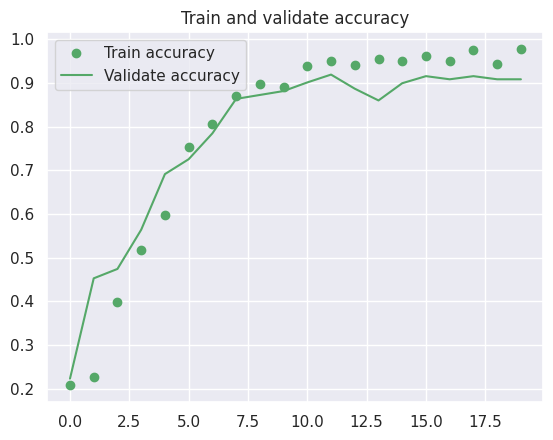

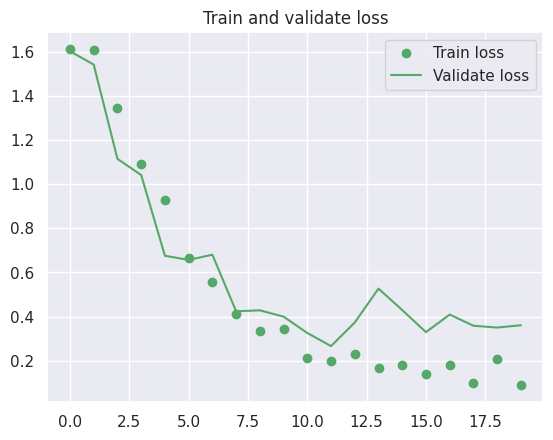

In [ ]:
acc = history_lstm2.history['acc']
val_acc = history_lstm2.history['val_acc']
loss = history_lstm2.history['loss']
val_loss = history_lstm2.history['val_loss']

plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()

plt.figure()

plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()

plt.show()

## **GRU**

In [ ]:
epochs = 20
emb_dim = 256
batch_size = 50
model_gru = Sequential()
model_gru.add(Embedding(vocabulary_size,emb_dim ,input_length=X_DeepLearning.shape[1]))
model_gru.add(SpatialDropout1D(0.8))
model_gru.add(GRU(units=64, dropout=0.2, recurrent_dropout=0.2))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(256, activation='relu'))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(5, activation='softmax'))
model_gru.compile(optimizer=tf.optimizers.Adam(),loss='categorical_crossentropy', metrics=['acc'])
print(model_gru.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 768, 256)          3840000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 768, 256)         0         
 lDropout1D)                                                     
                                                                 
 gru (GRU)                   (None, 64)                61824     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 256)               16640     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                      

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath="gru-best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks3=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_gru = model_gru.fit(XX_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(XX_test,y_test), callbacks=callbacks3)

Epoch 1/20
34/34 [==============================] - ETA: 0s - loss: 1.6055 - acc: 0.2158
Epoch 1: val_acc improved from -inf to 0.22621, saving model to gru-best_model.h5
34/34 [==============================] - 110s 3s/step - loss: 1.6055 - acc: 0.2158 - val_loss: 1.6021 - val_acc: 0.2262 - lr: 0.0010
Epoch 2/20
34/34 [==============================] - ETA: 0s - loss: 1.5944 - acc: 0.2536
Epoch 2: val_acc improved from 0.22621 to 0.26750, saving model to gru-best_model.h5
34/34 [==============================] - 110s 3s/step - loss: 1.5944 - acc: 0.2536 - val_loss: 1.5925 - val_acc: 0.2675 - lr: 0.0010
Epoch 3/20
34/34 [==============================] - ETA: 0s - loss: 1.5777 - acc: 0.2740
Epoch 3: val_acc improved from 0.26750 to 0.30700, saving model to gru-best_model.h5
34/34 [==============================] - 108s 3s/step - loss: 1.5777 - acc: 0.2740 - val_loss: 1.5651 - val_acc: 0.3070 - lr: 0.0010
Epoch 4/20
34/34 [==============================] - ETA: 0s - loss: 1.4475 - acc: 

In [ ]:
results_3 = model_gru.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_3[0]} - Accuracy: {100*results_3[1]}%')

Test results - Loss: 0.4353935718536377 - Accuracy: 91.74147248268127%


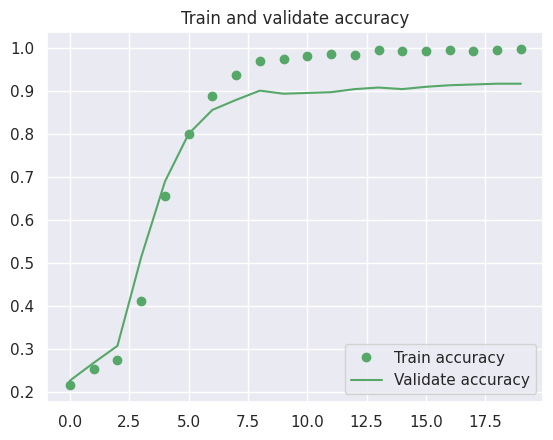

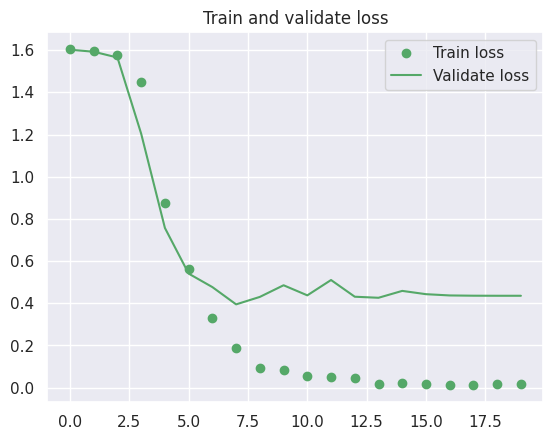

In [ ]:
acc = history_gru.history['acc']
val_acc = history_gru.history['val_acc']
loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']

plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()

plt.figure()

plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()

plt.show()

## **CNN+LSTM**

In [ ]:
epochs = 20
emb_dim = 256
batch_size = 50
model_cl = Sequential()
model_cl.add(Embedding(vocabulary_size,emb_dim, input_length=X_DeepLearning.shape[1]))
model_cl.add(SpatialDropout1D(0.8))
model_cl.add(Conv1D(filters=64, kernel_size=6, padding='same', activation='relu'))
model_cl.add(MaxPooling1D(pool_size=2))
model_cl.add(Conv1D(filters=32, kernel_size=6, activation='relu'))
model_cl.add(MaxPooling1D(pool_size=2))
model_cl.add(Bidirectional(LSTM(100, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))
model_cl.add(Dropout(0.5))
model_cl.add(Bidirectional(LSTM(400, dropout=0.5, recurrent_dropout=0.5)))
model_cl.add(Dropout(0.5))
model_cl.add(Flatten())
model_cl.add(Dense(64, activation='relu'))
model_cl.add(Dropout(0.5))
model_cl.add(Dense(5, activation='softmax'))
model_cl.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
print(model_cl.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 768, 256)          3840000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 768, 256)         0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 768, 64)           98368     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 384, 64)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 379, 32)           12320     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 189, 32)          0

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath="cnn+lastm-best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_cl = model_cl.fit(XX_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1, callbacks=callbacks)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 1.6092 - acc: 0.2112 
Epoch 1: val_acc improved from -inf to 0.26347, saving model to cnn+lastm-best_model.h5
31/31 [==============================] - 362s 11s/step - loss: 1.6092 - acc: 0.2112 - val_loss: 1.5981 - val_acc: 0.2635 - lr: 0.0010
Epoch 2/20
31/31 [==============================] - ETA: 0s - loss: 1.6089 - acc: 0.2252 
Epoch 2: val_acc did not improve from 0.26347
31/31 [==============================] - 332s 11s/step - loss: 1.6089 - acc: 0.2252 - val_loss: 1.6002 - val_acc: 0.2156 - lr: 0.0010
Epoch 3/20
31/31 [==============================] - ETA: 0s - loss: 1.5853 - acc: 0.2418 
Epoch 3: val_acc improved from 0.26347 to 0.40120, saving model to cnn+lastm-best_model.h5
31/31 [==============================] - 335s 11s/step - loss: 1.5853 - acc: 0.2418 - val_loss: 1.4076 - val_acc: 0.4012 - lr: 0.0010
Epoch 4/20
31/31 [==============================] - ETA: 0s - loss: 1.1443 - acc: 0.4730 
Epoch 4: val_

In [ ]:
results_4 = model_cl.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_4[0]} - Accuracy: {100*results_4[1]}%')

Test results - Loss: 0.35947689414024353 - Accuracy: 90.30520915985107%


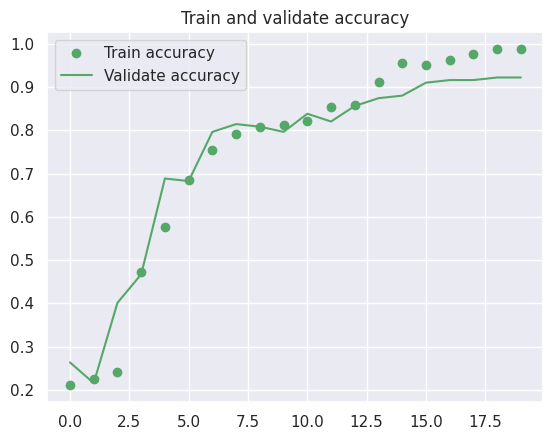

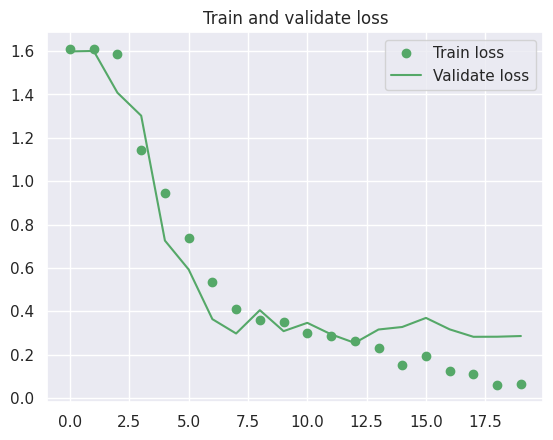

In [ ]:
acc = history_cl.history['acc']
val_acc = history_cl.history['val_acc']
loss = history_cl.history['loss']
val_loss = history_cl.history['val_loss']
plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()

plt.figure()
plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()
plt.show()

## **Bert Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.33, random_state=42)

In [ ]:
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [ ]:
class_names = ['sport', 'business', 'politics','tech', 'entertainment']

In [ ]:
(x_train,y_train), (x_val,y_val), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=512,
                                                                       max_features=20000)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


/usr/local/lib/python3.9/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


task: text classification


In [ ]:
model = text.text_classifier('bert', train_data=(x_train,y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 512


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train,y_train),
                             val_data=(x_val,y_val),
                             batch_size=6)

In [ ]:
learner.fit_onecycle(2e-5, 3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
249/249 [==============================] - 276s 993ms/step - loss: 0.7322 - accuracy: 0.7604 - val_loss: 0.1110 - val_accuracy: 0.9782
Epoch 2/3
249/249 [==============================] - 253s 1s/step - loss: 0.0882 - accuracy: 0.9812 - val_loss: 0.0633 - val_accuracy: 0.9810
Epoch 3/3
249/249 [==============================] - 254s 1s/step - loss: 0.0231 - accuracy: 0.9960 - val_loss: 0.0537 - val_accuracy: 0.9878


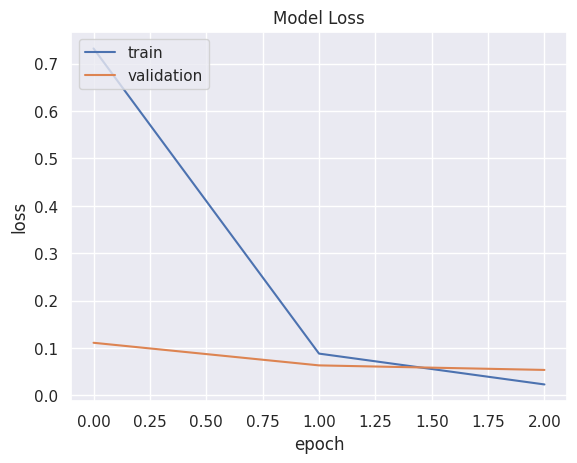

In [ ]:
learner.plot()

In [ ]:
learner.validate(val_data=(x_val,y_val), class_names=class_names)

23/23 [==============================] - 39s 1s/step
               precision    recall  f1-score   support

        sport       0.99      0.96      0.98       181
     business       1.00      0.99      1.00       129
     politics       0.95      1.00      0.98       125
         tech       0.99      1.00      1.00       158
entertainment       0.99      0.99      0.99       142

     accuracy                           0.99       735
    macro avg       0.99      0.99      0.99       735
 weighted avg       0.99      0.99      0.99       735



array([[174,   0,   6,   1,   0],
       [  0, 128,   0,   0,   1],
       [  0,   0, 125,   0,   0],
       [  0,   0,   0, 158,   0],
       [  1,   0,   0,   0, 141]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['business', 'entertainment', 'politics', 'sport', 'tech']

In [ ]:
message = 'One of the most exciting technological advancements in recent years has been the rise of artificial intelligence (AI) and machine learning (ML) technologies. These technologies have the potential to revolutionize countless industries, from healthcare and finance to manufacturing and transportation.'
prediction = predictor.predict(message)
print('predicted: {}'.format(prediction))

predicted: tech


**Save Bert Model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
predictor.save("/content/drive/MyDrive/Colab_Notebooks/DL Model/Bert_Model_Text_Classification")

**Load Saved Model and Predict**

In [ ]:
predictor1 = ktrain.load_predictor('/content/drive/MyDrive/Colab_Notebooks/DL Model/Bert_Model_Text_Classification')

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
data = "One of the biggest challenges facing politicians today is the growing divide between the rich and poor. The concentration of wealth in the hands of a few individuals is a major threat to our democracy, as it allows a small group of people to exert an outsized influence on our political system."
predictor1.predict(data)

'politics'

# **XLNet Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.25, random_state=42)

In [ ]:
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [ ]:
model_name = 'xlnet-base-cased'
trans = text.Transformer(model_name, maxlen = 512, classes = ['sport', 'business', 'politics','tech', 'entertainment'])

/usr/local/lib/python3.9/dist-packages/ktrain/text/preprocessor.py:382: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 388
	95percentile : 733
	99percentile : 938


/usr/local/lib/python3.9/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 396
	95percentile : 772
	99percentile : 1303


In [ ]:
model = trans.get_classifier()

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
learner = ktrain.get_learner(model, train_data=train_data, val_data=test_data, batch_size=6)

In [ ]:
learner.fit_onecycle(lr=2e-5, epochs=3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
278/278 [==============================] - 546s 2s/step - loss: 0.6217 - accuracy: 0.8267 - val_loss: 0.1520 - val_accuracy: 0.9533
Epoch 2/3
278/278 [==============================] - 522s 2s/step - loss: 0.1026 - accuracy: 0.9706 - val_loss: 0.1848 - val_accuracy: 0.9533
Epoch 3/3
278/278 [==============================] - 554s 2s/step - loss: 0.0252 - accuracy: 0.9946 - val_loss: 0.0838 - val_accuracy: 0.9785


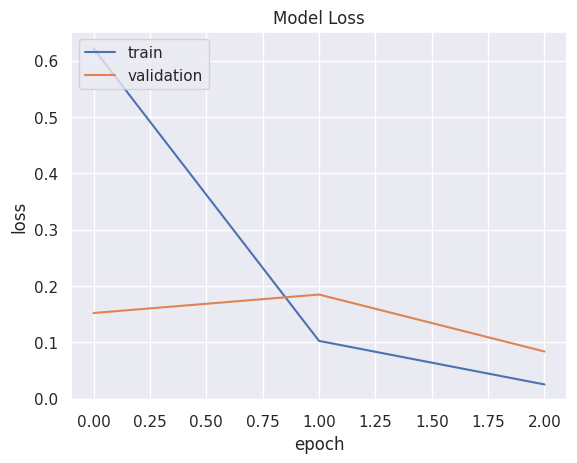

In [ ]:
learner.plot()

In [ ]:
learner.validate(val_data=test_data, class_names=trans.get_classes())#Lol, need more gpu memory

     15/Unknown - 54s 3s/step

ResourceExhaustedError: ignored

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc= trans)
predictor.get_classes()

['business', 'entertainment', 'politics', 'sport', 'tech']

In [ ]:
predictions = predictor.predict("One of the most exciting technological advancements in recent years has been the rise of artificial intelligence (AI) and machine learning (ML) technologies. These technologies have the potential to revolutionize countless industries, from healthcare and finance to manufacturing and transportation.")
print('predicted: {}'.format(predictions))

predicted: tech


In [ ]:
predictor.save("/content/drive/MyDrive/Colab_Notebooks/DL Model/xlnet_model_Text_Classification")

In [ ]:
predictor1 = ktrain.load_predictor('/content/drive/MyDrive/Colab_Notebooks/DL Model/xlnet_model_Text_Classification')

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
data = "Politics can be a messy business, but it's essential to the functioning of our society. At its core, politics is about making decisions that affect the lives of millions of people. It's about figuring out how to allocate resources, provide public services, and ensure that everyone has a say in the decisions that affect them."
predictor1.predict(data)

'politics'